In [78]:
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

In [79]:
## define functions
# inertia
def interia_plot(data, max_clust = 50):
    ks = range(1, max_clust)
    inertias = []
    
    for k in ks:
        model = KMeans(n_clusters = k)
        model.fit(data)
        inertias.append(model.inertia_)
        
    fig, ax = plt.subplots(figsize = (12, 8))
    plt.plot(ks, inertias, '-o')
    
    plt.xlabel('number of clusters, k')
    plt.ylabel('inertia')
    plt.xticks(ks)
    plt.show()
    
# scree_plot
def scree_plot(pca_object):
    fig, ax = plt.subplots(figsize = (10, 8))
    features = range(pca_object.n_components_)
    
    plt.plot(features,
             pca_object.explained_variance_ratio_,
             linewidth = 2,
             marker = 'o',
             markersize = 10,
             markeredgecolor = 'black',
             markerfacecolor = 'grey')
    
    plt.title('Scree Plot')
    plt.xlabel('PCA feature')
    plt.ylabel('Explained Variance')
    plt.xticks(features)
    plt.show()

In [80]:
## Data processing
# import data
df = pd.read_excel('E:/Download/survey_data-1.xlsx')
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 500)
pd.set_option('display.max_colwidth', 500)
df

,surveyID,Am the life of the party,Feel little concern for others,Am always prepared,Get stressed out easily,Have a rich vocabulary,Don't talk a lot,Am interested in people,Leave my belongings around,Am relaxed most of the time,Have difficulty understanding abstract ideas,Feel comfortable around people,Insult people,Pay attention to details,Worry about things,Have a vivid imagination,Keep in the background,Sympathize with others' feelings,Make a mess of things,Seldom feel blue,Am not interested in abstract ideas,Start conversations,Am not interested in other people's problems,Get chores done right away,Am easily disturbed,Have excellent ideas,Have little to say,Have a soft heart,Often forget to put things back in their proper place,Get upset easily,Do not have a good imagination,Talk to a lot of different people at parties,Am not really interested in others,Like order,Change my mood a lot,Am quick to understand things,Don't like to draw attention to myself,Take time out for others,Shirk my duties,Have frequent mood swings,Use difficult words,Don't mind being the center of attention,Feel others' emotions,Follow a schedule,Get irritated easily,Spend time reflecting on things,Am quiet around strangers,Make people feel at ease,Am exacting in my work,Often feel blue,Am full of ideas,See underlying patterns in complex situations,Don't generate ideas that are new and different,Demonstrate an awareness of personal strengths and limitations,Display a growth mindset,Respond effectively to multiple priorities,"Take initiative even when circumstances, objectives, or rules aren't clear",Encourage direct and open discussions,Respond effectively to multiple priorities.1,"Take initiative even when circumstances, objectives, or rules aren't clear.1",Encourage direct and open discussions.1,Listen carefully to others,Don't persuasively sell a vision or idea,Build cooperative relationships,Work well with people from diverse cultural backgrounds,"Effectively negotiate interests, resources, and roles",Can't rally people on the team around a common goal,Translate ideas into plans that are organized and realistic,Resolve conflicts constructively,Seek and use feedback from teammates,Coach teammates for performance and growth,Drive for results,What laptop do you currently have?,What laptop would you buy in next assuming if all laptops cost the same?,What program are you in?,What is your age?,Gender,What is your nationality?,What is your ethnicity?
0,a1000,4,3,4,3,4,2,3,2,3,2,2,1,5,4,4,4,4,2,2,3,4,3,4,2,3,2,4,2,2,3,3,2,5,4,4,3,3,2,3,3,3,3,4,2,4,3,3,4,2,3,4,2,4,4,4,4,4,4,4,4,4,3,4,4,4,2,4,4,4,4,4,Macbook,Macbook,DD (MIB & Business Analytics),25,Female,ecuador,Hispanic / Latino
1,a1001,2,4,3,4,3,3,2,3,4,2,3,1,4,4,5,3,4,2,4,2,3,5,3,4,4,3,4,2,1,1,2,2,5,4,4,4,4,3,2,2,2,3,5,4,5,4,5,5,3,4,4,2,2,4,4,4,5,5,5,5,5,2,4,4,2,3,4,5,5,4,5,Windows laptop,Windows laptop,One year Business Analytics,27,Male,Ecuador,Hispanic / Latino
2,a1002,4,4,5,1,4,3,2,2,5,1,3,3,5,1,2,3,2,1,5,4,3,4,4,3,3,2,3,2,2,2,4,3,1,2,5,4,3,2,1,2,5,3,4,4,2,3,3,3,1,4,3,2,5,3,5,2,3,5,2,3,3,2,3,4,4,2,4,2,3,3,5,Windows laptop,Windows laptop,One year Business Analytics,25,Male,Indian,West Asian / Indian
3,a1003,4,5,3,3,3,3,5,3,5,4,3,1,4,4,5,5,5,3,3,3,4,2,3,1,5,4,5,2,2,1,3,3,3,4,3,3,4,3,4,3,2,5,3,5,5,3,5,3,3,5,3,3,3,5,5,5,4,4,4,4,5,3,5,5,5,5,3,5,5,5,5,Windows laptop,Windows laptop,One year Business Analytics,26,Female,indian,West Asian / Indian
4,a1004,5,4,4,4,3,3,3,3,3,3,3,3,3,4,5,4,4,4,4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,4,4,3,3,4,4,4,4,4,3,3,3,3,4,4,3,3,3,5,3,3,3,3,3,3,4,4,4,3,3,4,4,3,3,3,3,3,Macbook,Windows laptop,DD (MBA & Disruptive innovation),27,Male,China,Far east Asian
5,a1005,3,2,2,5,2,2,4,2,3,2,2,2,4,5,3,4,4,4,2,3,2,2,2,4,3,4,4,3,3,2,2,2,3,4,4,4,4,3,3,3,3,4,2,4,4,4,3,3,4,3,4,2,3,4,4,3,3,4,3,3,4,4,3,4,3,2,3,3,5,3,4,Macbook,Macbook,DD (MIB & Business Analytics),22,Male,Indian,West Asian / Indian
6,a1006,3,4,4,5,3,4,4,3,2,1,2,2,4,4,3,3,4,3,3,2,2,2,1,4,4,3,4,2,4,2,4,2,3,3,4,1,4,3,3,2,3,4,4,4,3,5,4,3,3,

In [81]:
# check null value
df.isnull().sum()

surveyID                                                                        0
Am the life of the party                                                        0
Feel little concern for others                                                  0
Am always prepared                                                              0
Get stressed out easily                                                         0
Have a rich vocabulary                                                          0
Don't talk a lot                                                                0
Am interested in people                                                         0
Leave my belongings around                                                      0
Am relaxed most of the time                                                     0
Have difficulty understanding abstract ideas                                    0
Feel comfortable around people                                                  0
Insult people   

In [82]:
# check element
Counter(np.unique(df.columns))

Counter({'Am always prepared': 1,
         'Am easily disturbed': 1,
         'Am exacting in my work': 1,
         'Am full of ideas': 1,
         'Am interested in people': 1,
         'Am not interested in abstract ideas': 1,
         "Am not interested in other people's problems": 1,
         'Am not really interested in others': 1,
         'Am quick to understand things': 1,
         'Am quiet around strangers': 1,
         'Am relaxed most of the time': 1,
         'Am the life of the party': 1,
         'Build cooperative relationships': 1,
         "Can't rally people on the team around a common goal": 1,
         'Change my mood a lot': 1,
         'Coach teammates for performance and growth': 1,
         'Demonstrate an awareness of personal strengths and limitations': 1,
         'Display a growth mindset': 1,
         'Do not have a good imagination': 1,
         "Don't  generate ideas that are new and different": 1,
         "Don't like to draw attention to myself": 1,
  

In [83]:
# make it easy to copy the column names
for i in df.columns:
    print('"' + i + '"')

"surveyID"
"Am the life of the party"
"Feel little concern for others"
"Am always prepared"
"Get stressed out easily"
"Have a rich vocabulary"
"Don't talk a lot"
"Am interested in people"
"Leave my belongings around"
"Am relaxed most of the time"
"Have difficulty understanding abstract ideas"
"Feel comfortable around people"
"Insult people"
"Pay attention to details"
"Worry about things"
"Have a vivid imagination"
"Keep in the background"
"Sympathize with others' feelings"
"Make a mess of things"
"Seldom feel blue"
"Am not interested in abstract ideas"
"Start conversations"
"Am not interested in other people's problems"
"Get chores done right away"
"Am easily disturbed"
"Have excellent ideas"
"Have little to say"
"Have a soft heart"
"Often forget to put things back in their proper place"
"Get upset easily"
"Do not have a good imagination"
"Talk to a lot of different people at parties"
"Am not really interested in others"
"Like order"
"Change my mood a lot"
"Am quick to understand thing

In [84]:
# get the new columns with the mean of the same questions
for i in range(147):
    df.loc[i, "mean of Respond effectively to multiple priorities"] = (df.loc[i, "Respond effectively to multiple priorities"] + df.loc[i, "Respond effectively to multiple priorities.1"])/2
    df.loc[i, "mean of Take initiative even when circumstances, objectives, or rules aren't clear"] = (df.loc[i, "Take initiative even when circumstances, objectives, or rules aren't clear"] + df.loc[i, "Take initiative even when circumstances, objectives, or rules aren't clear.1"])/2
    df.loc[i, "mean of Encourage direct and open discussions"] = (df.loc[i, "Encourage direct and open discussions"] + df.loc[i, "Encourage direct and open discussions.1"])/2

In [86]:
# save the demographic as df_d
df_d = df.drop(["Am always prepared","Am easily disturbed",
                  "Am exacting in my work","Am full of ideas",
                  "Am interested in people","Am not interested in abstract ideas",
                  "Am not interested in other people's problems",
                  "Am not really interested in others",
                  "Am quick to understand things","Am quiet around strangers",
                  "Am relaxed most of the time","Am the life of the party",
                  "Build cooperative relationships",
                  "Can't rally people on the team around a common goal",
                  "Change my mood a lot",
                  "Coach teammates for performance and growth",
                  "Demonstrate an awareness of personal strengths and limitations",
                  "Display a growth mindset","Do not have a good imagination",
                  "Don't  generate ideas that are new and different",
                  "Don't like to draw attention to myself",
                  "Don't mind being the center of attention",
                  "Don't persuasively sell a vision or idea", "Don't talk a lot",
                  "Drive for results",
                  "Effectively negotiate interests, resources, and roles",
                  "Encourage direct and open discussions",
                  "Feel comfortable around people","Feel little concern for others",
                  "Feel others' emotions","Follow a schedule",
                  "Get chores done right away","Get irritated easily",
                  "Get stressed out easily","Get upset easily",
                  "Have a rich vocabulary","Have a soft heart",
                  "Have a vivid imagination",
                  "Have difficulty understanding abstract ideas",
                  "Have excellent ideas","Have frequent mood swings",
                  "Have little to say","Insult people","Keep in the background",
                  "Leave my belongings around","Like order",
                  "Listen carefully to others","Make a mess of things",
                  "Make people feel at ease","Often feel blue",
                  "Often forget to put things back in their proper place",
                  "Pay attention to details","Resolve conflicts constructively",
                  "Respond effectively to multiple priorities",
                  "See underlying patterns in complex situations",
                  "Seek and use feedback from teammates","Seldom feel blue",
                  "Shirk my duties","Spend time reflecting on things",
                  "Start conversations", "Sympathize with others' feelings",
                  "Take initiative even when circumstances, objectives, or rules aren't clear",
                  "Take time out for others",
                  "Talk to a lot of different people at parties",
                  "Translate ideas into plans that are organized and realistic",
                  "Use difficult words",
                  "Worry about things",
                  "Work well with people from diverse cultural backgrounds",
                  "Respond effectively to multiple priorities.1",
                  "Take initiative even when circumstances, objectives, or rules aren't clear.1",
                  "Encourage direct and open discussions.1",
                  "mean of Respond effectively to multiple priorities",
                  "mean of Take initiative even when circumstances, objectives, or rules aren't clear",
                 "mean of Encourage direct and open discussions"], axis = 1)
df_d

,surveyID,What laptop do you currently have?,What laptop would you buy in next assuming if all laptops cost the same?,What program are you in?,What is your age?,Gender,What is your nationality?,What is your ethnicity?
0,a1000,Macbook,Macbook,DD (MIB & Business Analytics),25,Female,ecuador,Hispanic / Latino
1,a1001,Windows laptop,Windows laptop,One year Business Analytics,27,Male,Ecuador,Hispanic / Latino
2,a1002,Windows laptop,Windows laptop,One year Business Analytics,25,Male,Indian,West Asian / Indian
3,a1003,Windows laptop,Windows laptop,One year Business Analytics,26,Female,indian,West Asian / Indian
4,a1004,Macbook,Windows laptop,DD (MBA & Disruptive innovation),27,Male,China,Far east Asian
5,a1005,Macbook,Macbook,DD (MIB & Business Analytics),22,Male,Indian,West Asian / Indian
6,a1006,Windows laptop,Macbook,DD (MIB & Business Analytics),23,Female,Dominican,Hispanic / Latino
7,a1007,Macbook,Macbook,DD (MIB & Business Analytics),23,Male,Belgian,White / Caucasian
8,a1008,Windows laptop,Windows laptop,DD (MIB & Business Analytics),25,Female,Swiss,White / Caucasian
9,a1009,Macbook,Macbook,DD (MBA & Business Analytics),38,Male,Japan,Far east Asian


In [88]:
# save the Big 5 personility as df_5
df_5 = df.drop(["surveyID",
                "See underlying patterns in complex situations",
                "Don't  generate ideas that are new and different",
                "Demonstrate an awareness of personal strengths and limitations",
                "Display a growth mindset",
                "Respond effectively to multiple priorities",
                "Respond effectively to multiple priorities.1",
                "mean of Respond effectively to multiple priorities",
                "Take initiative even when circumstances, objectives, or rules aren't clear",
                "Take initiative even when circumstances, objectives, or rules aren't clear.1",
                "mean of Take initiative even when circumstances, objectives, or rules aren't clear",
                "Encourage direct and open discussions",
                "Respond effectively to multiple priorities",
                "Take initiative even when circumstances, objectives, or rules aren't clear",
                "Encourage direct and open discussions",
                "Encourage direct and open discussions.1",
                "mean of Encourage direct and open discussions",
                "Listen carefully to others",
                "Don't persuasively sell a vision or idea",
                "Build cooperative relationships",
                "Work well with people from diverse cultural backgrounds",
                "Effectively negotiate interests, resources, and roles",
                "Can't rally people on the team around a common goal",
                "Translate ideas into plans that are organized and realistic",
                "Resolve conflicts constructively",
                "Seek and use feedback from teammates",
                "Coach teammates for performance and growth",
                "Drive for results",
                "What is your age?",
                "What is your ethnicity?",
                "What is your nationality? ",
                "What laptop do you currently have?",
                "What laptop would you buy in next assuming if all laptops cost the same?",
                "What program are you in?",
                "Gender",
                "mean of Respond effectively to multiple priorities",
                "mean of Take initiative even when circumstances, objectives, or rules aren't clear",
                "mean of Encourage direct and open discussions"], axis = 1)
df_5

,Am the life of the party,Feel little concern for others,Am always prepared,Get stressed out easily,Have a rich vocabulary,Don't talk a lot,Am interested in people,Leave my belongings around,Am relaxed most of the time,Have difficulty understanding abstract ideas,Feel comfortable around people,Insult people,Pay attention to details,Worry about things,Have a vivid imagination,Keep in the background,Sympathize with others' feelings,Make a mess of things,Seldom feel blue,Am not interested in abstract ideas,Start conversations,Am not interested in other people's problems,Get chores done right away,Am easily disturbed,Have excellent ideas,Have little to say,Have a soft heart,Often forget to put things back in their proper place,Get upset easily,Do not have a good imagination,Talk to a lot of different people at parties,Am not really interested in others,Like order,Change my mood a lot,Am quick to understand things,Don't like to draw attention to myself,Take time out for others,Shirk my duties,Have frequent mood swings,Use difficult words,Don't mind being the center of attention,Feel others' emotions,Follow a schedule,Get irritated easily,Spend time reflecting on things,Am quiet around strangers,Make people feel at ease,Am exacting in my work,Often feel blue,Am full of ideas
0,4,3,4,3,4,2,3,2,3,2,2,1,5,4,4,4,4,2,2,3,4,3,4,2,3,2,4,2,2,3,3,2,5,4,4,3,3,2,3,3,3,3,4,2,4,3,3,4,2,3
1,2,4,3,4,3,3,2,3,4,2,3,1,4,4,5,3,4,2,4,2,3,5,3,4,4,3,4,2,1,1,2,2,5,4,4,4,4,3,2,2,2,3,5,4,5,4,5,5,3,4
2,4,4,5,1,4,3,2,2,5,1,3,3,5,1,2,3,2,1,5,4,3,4,4,3,3,2,3,2,2,2,4,3,1,2,5,4,3,2,1,2,5,3,4,4,2,3,3,3,1,4
3,4,5,3,3,3,3,5,3,5,4,3,1,4,4,5,5,5,3,3,3,4,2,3,1,5,4,5,2,2,1,3,3,3,4,3,3,4,3,4,3,2,5,3,5,5,3,5,3,3,5
4,5,4,4,4,3,3,3,3,3,3,3,3,3,4,5,4,4,4,4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,4,4,3,3,4,4,4,4,4,3,3,3,3,4,4,3
5,3,2,2,5,2,2,4,2,3,2,2,2,4,5,3,4,4,4,2,3,2,2,2,4,3,4,4,3,3,2,2,2,3,4,4,4,4,3,3,3,3,4,2,4,4,4,3,3,4,3
6,3,4,4,5,3,4,4,3,2,1,2,2,4,4,3,3,4,3,3,2,2,2,1,4,4,3,4,2,4,2,4,2,3,3,4,1,4,3,3,2,3,4,4,4,3,5,4,3,3,3
7,4,3,2,2,2,3,5,5,5,4,5,4,1,4,2,4,2,4,3,2,4,2,2,4,3,3,1,5,2,4,2,3,5,1,5,5,4,3,1,1,3,2,1,1,2,3,4,3,3,2
8,3,5,4,2,4,1,4,1,3,1,5,1,5,3,3,2,4,2,4,2,4,2,3,2,4,2,4,3,2,2,3,2,4,2,4,2,4,2,1,3,4,4,4,1,5,3,4,4,1,3
9,1,3,5,4,2,3,3,1,4,3,3,1,5,3,4,3,3,2,3,2,4,2,3,4,3,2,3,2,2,3,3,4,2,3,4,4,3,3,2,2,2,4,4,2,3,4,4,4,2,3


In [89]:
# save the Hult DNA personility as df_3
df_3 = df.drop(["surveyID",
                "Am always prepared","Am easily disturbed",
                  "Am exacting in my work","Am full of ideas",
                  "Am interested in people","Am not interested in abstract ideas",
                  "Am not interested in other people's problems",
                  "Am not really interested in others",
                  "Am quick to understand things","Am quiet around strangers",
                  "Am relaxed most of the time","Am the life of the party",
                  "Change my mood a lot",
                  "Do not have a good imagination",
                  "Don't like to draw attention to myself",
                  "Don't mind being the center of attention",
                  "Feel comfortable around people","Feel little concern for others",
                  "Feel others' emotions","Follow a schedule","Gender",
                  "Get chores done right away",
                  "Get irritated easily",
                  "Get stressed out easily",
                  "Get upset easily",
                  "Have a rich vocabulary",
                  "Have a soft heart",
                  "Have a vivid imagination",
                  "Have difficulty understanding abstract ideas",
                  "Have excellent ideas",
                  "Have frequent mood swings",
                  "Have little to say",
                  "Insult people","Keep in the background",
                  "Leave my belongings around",
                  "Like order",
                  "Make people feel at ease",
                  "Often feel blue",
                  "Often forget to put things back in their proper place",
                  "Pay attention to details",
                  "Seldom feel blue",
                  "Shirk my duties",
                  "Spend time reflecting on things",
                  "Start conversations", 
                  "Sympathize with others' feelings",
                  "Take time out for others",
                  "Talk to a lot of different people at parties",
                  "Use difficult words",
                  "Worry about things",
                  "What is your age?",
                  "What is your ethnicity?",
                  "What is your nationality? ",
                  "What laptop do you currently have?",
                  "What laptop would you buy in next assuming if all laptops cost the same?",
                  "What program are you in?",
                  "Gender",
                  "Respond effectively to multiple priorities",
                "Respond effectively to multiple priorities.1",
                "Take initiative even when circumstances, objectives, or rules aren't clear",
                "Take initiative even when circumstances, objectives, or rules aren't clear.1",
                "Encourage direct and open discussions",
                "Encourage direct and open discussions.1"], axis = 1)
df_3

,Don't talk a lot,Make a mess of things,See underlying patterns in complex situations,Don't generate ideas that are new and different,Demonstrate an awareness of personal strengths and limitations,Display a growth mindset,Listen carefully to others,Don't persuasively sell a vision or idea,Build cooperative relationships,Work well with people from diverse cultural backgrounds,"Effectively negotiate interests, resources, and roles",Can't rally people on the team around a common goal,Translate ideas into plans that are organized and realistic,Resolve conflicts constructively,Seek and use feedback from teammates,Coach teammates for performance and growth,Drive for results,mean of Respond effectively to multiple priorities,"mean of Take initiative even when circumstances, objectives, or rules aren't clear",mean of Encourage direct and open discussions
0,2,2,4,2,4,4,4,3,4,4,4,2,4,4,4,4,4,4.0,4.0,4.0
1,3,2,4,2,2,4,5,2,4,4,2,3,4,5,5,4,5,4.5,4.5,5.0
2,3,1,3,2,5,3,3,2,3,4,4,2,4,2,3,3,5,5.0,2.0,3.0
3,3,3,3,3,3,5,5,3,5,5,5,5,3,5,5,5,5,4.5,4.5,4.0
4,3,4,3,3,5,3,4,4,3,3,4,4,3,3,3,3,3,3.0,3.0,3.5
5,2,4,4,2,3,4,4,4,3,4,3,2,3,3,5,3,4,4.0,3.0,3.0
6,4,3,4,3,4,5,4,2,4,5,4,4,5,4,5,4,5,4.0,3.5,4.0
7,3,4,3,4,4,5,4,3,5,5,5,3,4,5,5,5,5,5.0,5.0,5.0
8,1,2,4,2,4,4,4,3,4,4,4,1,5,4,4,4,4,4.0,4.0,4.0
9,3,2,4,4,4,4,4,3,4,4,4,2,4,4,4,4,4,4.0,3.0,4.0


In [90]:
## scale the data
# scale for Big 5, fit and transform
scaler = StandardScaler()
scaler.fit(df_5)

y_5_scaled = scaler.transform(df_5)
df_5_scaled = pd.DataFrame(y_5_scaled)

df_5_scaled.columns = df_5.columns

# checking the pre- and post-scaling variance
print(pd.np.var(df_5), '\n\n')
print(pd.np.var(df_5_scaled))

Am the life of the party                                 1.278171
Feel little concern for others                           1.708270
Am always prepared                                       0.847240
Get stressed out easily                                  1.454394
Have a rich vocabulary                                   0.904716
Don't talk a lot                                         1.185432
Am interested in people                                  0.961081
Leave my belongings around                               1.864871
Am relaxed most of the time                              1.186543
Have difficulty understanding abstract ideas             1.208200
Feel comfortable around people                           0.984127
Insult people                                            0.902402
Pay attention to details                                 0.690268
Worry about things                                       1.349438
Have a vivid imagination                                 0.910824
Keep in th

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  if sys.path[0] == '':
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  del sys.path[0]


In [91]:
# scale for Hult DNA, fit and transform
scaler = StandardScaler()
scaler.fit(df_3)

y_3_scaled = scaler.transform(df_3)
df_3_scaled = pd.DataFrame(y_3_scaled)

df_3_scaled.columns = df_3.columns

# checking the pre- and post-scaling variance
print(pd.np.var(df_3), '\n\n')
print(pd.np.var(df_3_scaled))

Don't talk a lot                                                                      1.185432
Make a mess of things                                                                 1.199500
See underlying patterns in complex situations                                         0.598454
Don't  generate ideas that are new and different                                      1.216993
Demonstrate an awareness of personal strengths and limitations                        0.563469
Display a growth mindset                                                              0.599195
Listen carefully to others                                                            0.653061
Don't persuasively sell a vision or idea                                              1.024943
Build cooperative relationships                                                       0.515618
Work well with people from diverse cultural backgrounds                               0.463511
Effectively negotiate interests, resources, and ro

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  # This is added back by InteractiveShellApp.init_path()
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  if sys.path[0] == '':


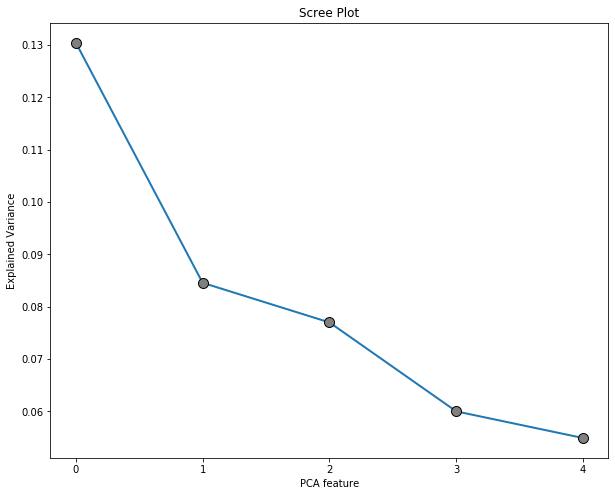

In [92]:
## Develop a PCA object
# pca for Big 5
pca_5 = PCA(n_components = 5,
            random_state = 222)

pca_df_5 = pca_5.fit_transform(df_5_scaled)

scree_plot(pca_5)

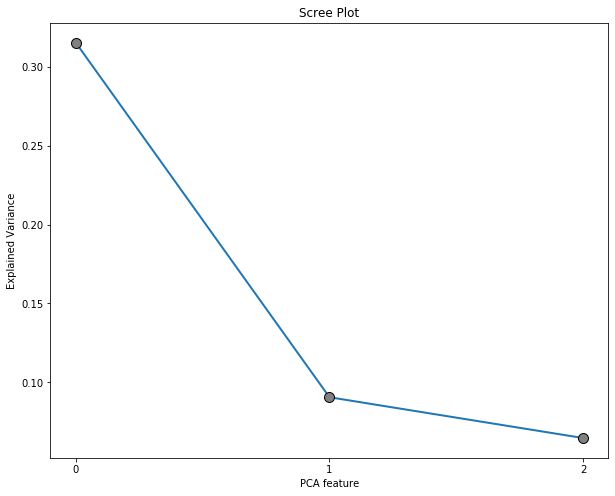

In [93]:
# pca for Hult DNA
pca_3 = PCA(n_components = 3,
            random_state = 222)

pca_df_3 = pca_3.fit_transform(df_3_scaled)

scree_plot(pca_3)

In [ ]:
1 o


In [94]:
## Compare the variance of the unlimited PCA model with the variance of the reduced PCA model
# Big 5
factor_loadings_5 = pd.DataFrame(pd.np.transpose(pca_5.components_))

factor_5 = factor_loadings_5.set_index(df_5.columns)

# check the results
print(f"""
Components Factor Loadings For Big 5
______________________________________
{factor_5.round(2)}
""")


Components Factor Loadings For Big 5
______________________________________
                                                          0     1     2     3     4
Am the life of the party                              -0.02  0.20 -0.26 -0.03 -0.02
Feel little concern for others                         0.14 -0.01 -0.11  0.07  0.09
Am always prepared                                    -0.12  0.00 -0.02  0.22 -0.02
Get stressed out easily                                0.11  0.26  0.10 -0.03 -0.21
Have a rich vocabulary                                -0.17  0.05  0.01  0.20  0.03
Don't talk a lot                                       0.13 -0.07  0.23  0.02  0.22
Am interested in people                               -0.13  0.12 -0.06 -0.26  0.08
Leave my belongings around                             0.10  0.07 -0.14 -0.10  0.26
Am relaxed most of the time                           -0.03 -0.13 -0.12 -0.04  0.35
Have difficulty understanding abstract ideas           0.13  0.11  0.01 -0.30 -0.12

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [95]:
# Hult DNA
factor_loadings_3 = pd.DataFrame(pd.np.transpose(pca_3.components_))

factor_3 = factor_loadings_3.set_index(df_3.columns)

# check the results
print(f"""
Components Factor Loadings For Hult DNA
______________________________________
{factor_3.round(2)}
""")


Components Factor Loadings For Hult DNA
______________________________________
                                                                                       0     1     2
Don't talk a lot                                                                    0.06  0.39 -0.32
Make a mess of things                                                               0.08  0.25  0.39
See underlying patterns in complex situations                                      -0.23 -0.07 -0.08
Don't  generate ideas that are new and different                                    0.09  0.29  0.47
Demonstrate an awareness of personal strengths and limitations                     -0.23  0.08  0.18
Display a growth mindset                                                           -0.24 -0.12  0.06
Listen carefully to others                                                         -0.18  0.31 -0.32
Don't persuasively sell a vision or idea                                            0.09  0.51  0.08
Build coope

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  


In [114]:
# naming each principal compoent of Big 5
factor_5.columns = ['Neuroticism',
                    'Extraversion',
                    'Agreeableness',
                    'Openness',
                    'Conscientiousness']
factor_5

,Neuroticism,Extraversion,Agreeableness,Openness,Conscientiousness
Am the life of the party,-0.018408,0.199306,-0.263953,-0.032171,-0.016407
Feel little concern for others,0.137572,-0.011331,-0.114872,0.069977,0.085113
Am always prepared,-0.117451,0.004627,-0.016635,0.218493,-0.024919
Get stressed out easily,0.109183,0.259782,0.103780,-0.026388,-0.210653
Have a rich vocabulary,-0.172260,0.047848,0.008340,0.197304,0.030463
Don't talk a lot,0.129440,-0.065462,0.231328,0.016966,0.220580
Am interested in people,-0.133603,0.118108,-0.064271,-0.260672,0.083952
Leave my belongings around,0.104480,0.066696,-0.141948,-0.100811,0.264409
Am relaxed most of the time,-0.028196,-0.125509,-0.115304,-0.042312,0.345215
Have difficulty understanding abstract ideas,0.131832,0.106610,0.014209,-0.300855,-0.123675


In [115]:
# naming each principal compoent of Hult DNA
factor_3.columns = ['Communicating',
                    'Thinking',
                    'Team Building']
factor_3

,Communicating,Thinking,Team Building
Don't talk a lot,0.059656,0.389049,-0.317920
Make a mess of things,0.077305,0.253108,0.386637
See underlying patterns in complex situations,-0.230993,-0.066142,-0.079025
Don't generate ideas that are new and different,0.085514,0.288808,0.468146
Demonstrate an awareness of personal strengths and limitations,-0.229493,0.076575,0.176887
Display a growth mindset,-0.243492,-0.115001,0.055903
Listen carefully to others,-0.179095,0.310251,-0.315506
Don't persuasively sell a vision or idea,0.088804,0.512396,0.078915
Build cooperative relationships,-0.268048,0.140598,-0.050720
Work well with people from diverse cultural backgrounds,-0.277610,0.196597,-0.171985


In [116]:
# analysing factor strengths per person by Big 5
new_5 = pca_5.transform(df_5_scaled)

df_5_new = pd.DataFrame(new_5)

df_5_new

,0,1,2,3,4
0,0.168087,-0.200575,0.481754,0.722962,-1.618247
1,0.795005,0.172140,1.949161,1.542460,1.713727
2,1.149359,-3.949375,-3.118959,3.068403,-0.657346
3,0.587005,3.014556,0.646365,-1.457431,2.251238
4,3.852005,1.363523,-1.358835,0.419574,-0.102061
5,4.235426,1.272690,1.558282,-1.424550,-0.916328
6,2.659872,1.151841,0.814934,0.335086,-0.935445
7,4.407793,-3.434522,-4.201468,-3.542911,1.601687
8,-3.048382,-1.368932,-1.693464,0.149807,-0.840417
9,1.385708,-1.921602,0.470423,0.317923,-0.864028


In [117]:
# analysing factor strengths per person by Hult DNA
new_3 = pca_3.transform(df_3_scaled)

df_3_new = pd.DataFrame(new_3)

df_3_new

,0,1,2
0,0.016649,-0.637028,0.065650
1,-0.570826,-0.415507,-0.991804
2,2.598562,-1.658575,-0.936770
3,-1.980042,2.523409,0.583364
4,4.116339,1.331759,1.465715
5,2.746806,0.379276,0.190198
6,-1.126799,1.084104,-0.530116
7,-3.103861,1.667466,2.213930
8,-0.424032,-1.404677,-0.045467
9,0.544036,0.384100,0.334258


In [118]:
pd.np.var(df_5_new)
pd.np.var(df_3_new)

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  """Entry point for launching an IPython kernel.
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  


0    6.309524
1    1.810291
2    1.292495
dtype: float64

In [121]:
# instantiating a StandardScaler() object
scaler = StandardScaler()

scaler.fit(df_5_new)

# transform the data after fit
X_5_scaled = scaler.fit_transform(df_5_new)

df_5_scaled_new = pd.DataFrame(X_5_scaled)

# reattaching column names
df_5_scaled_new.columns = ['Neuroticism',
                    'Extraversion',
                    'Agreeableness',
                    'Openness',
                    'Conscientiousness']

# check the result
print(pd.np.var(df_5_new), '\n\n')
print(pd.np.var(df_5_scaled_new))

0    6.523260
1    4.229240
2    3.850852
3    3.001129
4    2.746402
dtype: float64 


Neuroticism          1.0
Extraversion         1.0
Agreeableness        1.0
Openness             1.0
Conscientiousness    1.0
dtype: float64


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead


In [120]:
scaler.fit(df_3_new)

# transform the data after fit
X_3_scaled = scaler.fit_transform(df_3_new)

df_3_scaled_new = pd.DataFrame(X_3_scaled)

# reattaching column names
df_3_scaled_new.columns = ['Communicating',
                    'Thinking',
                    'Team Building']

# check the result
print(pd.np.var(df_3_new), '\n\n')
print(pd.np.var(df_3_scaled_new))

0    6.309524
1    1.810291
2    1.292495
dtype: float64 


Communicating    1.0
Thinking         1.0
Team Building    1.0
dtype: float64


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  from ipykernel import kernelapp as app


In [122]:
# combind the personility
df_p = pd.concat([df_5_scaled_new, df_3_scaled_new], axis = 1)
df_p

,Neuroticism,Extraversion,Agreeableness,Openness,Conscientiousness,Communicating,Thinking,Team Building
0,0.065812,-0.097531,0.245497,0.417324,-0.976479,0.006628,-0.473461,0.057746
1,0.311270,0.083705,0.993274,0.890372,1.034093,-0.227251,-0.308819,-0.872392
2,0.450011,-1.920424,-1.589393,1.771210,-0.396654,1.034510,-1.232710,-0.823983
3,0.229832,1.465859,0.329382,-0.841290,1.358437,-0.788272,1.875484,0.513127
4,1.508185,0.663027,-0.692450,0.242196,-0.061586,1.638750,0.989809,1.289244
5,1.658306,0.618858,0.794086,-0.822309,-0.552929,1.093527,0.281891,0.167299
6,1.041426,0.560095,0.415283,0.193425,-0.564464,-0.448588,0.805744,-0.466291
7,1.725794,-1.670072,-2.141029,-2.045116,0.966486,-1.235674,1.239318,1.947374
8,-1.193540,-0.665657,-0.862974,0.086475,-0.507122,-0.168811,-1.044004,-0.039993
9,0.542550,-0.934399,0.239723,0.183518,-0.521370,0.216585,0.285476,0.294014


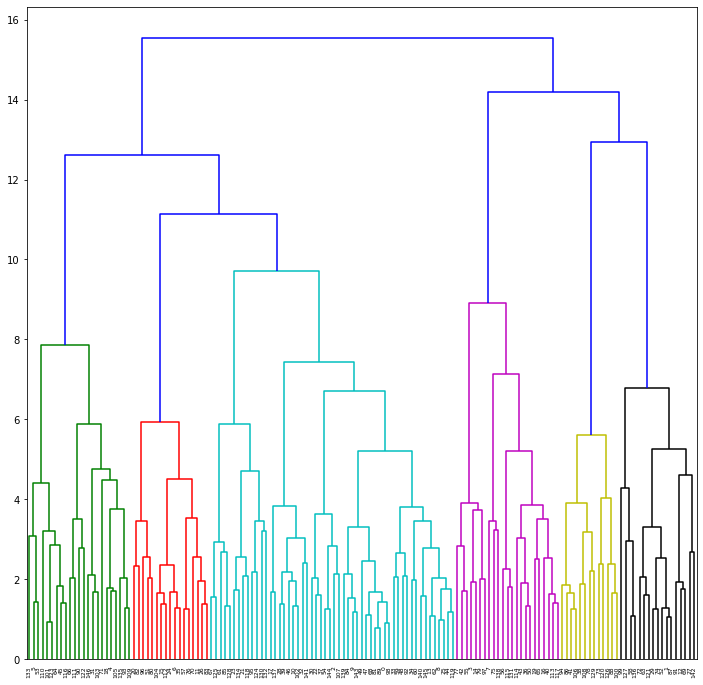

In [123]:
# check the plot
standard_mergings_ward = linkage(y = df_p, method = 'ward')

# setting plot size
fig, ax = plt.subplots(figsize = (12, 12))

dendrogram(Z = standard_mergings_ward,
           leaf_rotation = 90,
           leaf_font_size = 6)

plt.show()

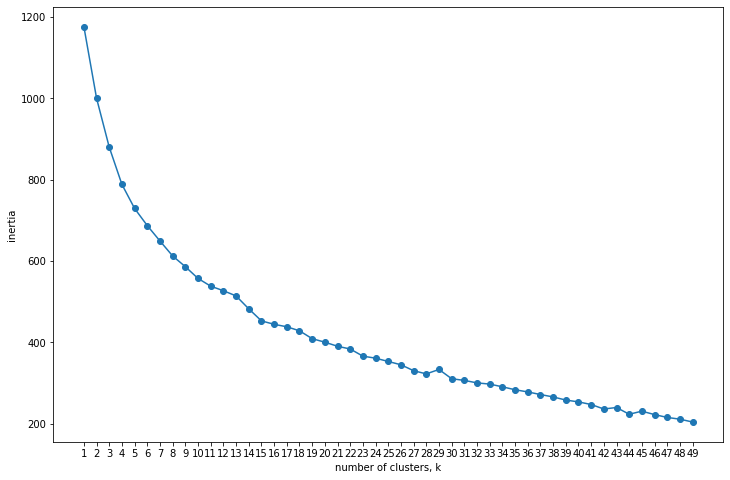

In [124]:
interia_plot(data = df_p)

In [125]:
# instantiating a k-means object with clusters base on personality
p_k_pca = KMeans(n_clusters =8,
                 random_state = 222)

# fit the object to the data
p_k_pca.fit(df_p)

# converting the clusters to data
p_kmeans_pca = pd.DataFrame({'Cluster' : p_k_pca.labels_})

# check the result
print(p_kmeans_pca.iloc[:, 0].value_counts())

3    30
7    20
1    20
6    19
2    19
5    18
0    14
4     7
Name: Cluster, dtype: int64


In [126]:
# storing cluster centers
p_pca = p_k_pca.cluster_centers_

# converting cluster centers into a DataFrame
p_pca_df = pd.DataFrame(p_pca)

# rename principal components
p_pca_df.columns = ['Neuroticism',
                    'Extraversion',
                    'Agreeableness',
                    'Openness',
                    'Conscientiousness',
                    'Communicating',
                    'Thinking',
                    'Team Building']

# check the result
p_pca_df.round(2)

,Neuroticism,Extraversion,Agreeableness,Openness,Conscientiousness,Communicating,Thinking,Team Building
0,0.62,0.29,-0.87,-0.90,0.87,0.44,0.66,1.02
1,-0.54,0.49,-1.09,0.87,0.07,-0.66,-0.65,0.76
2,0.55,1.03,0.86,0.09,-0.57,0.00,0.24,0.02
3,-0.14,-0.62,0.02,-0.68,-0.64,0.21,-0.03,0.06
4,0.54,1.06,0.74,-0.78,1.41,-0.60,2.37,-0.07
5,-1.47,-0.04,-0.18,-0.07,-0.10,-1.04,-0.61,-0.58
6,1.22,-0.55,-0.44,0.54,-0.52,1.48,-0.49,0.01
7,-0.23,-0.55,1.17,0.51,0.91,-0.23,0.19,-1.06


In [127]:
pca_df = pd.concat([df_d, p_kmeans_pca, df_p], axis = 1)
pca_df

,surveyID,What laptop do you currently have?,What laptop would you buy in next assuming if all laptops cost the same?,What program are you in?,What is your age?,Gender,What is your nationality?,What is your ethnicity?,Cluster,Neuroticism,Extraversion,Agreeableness,Openness,Conscientiousness,Communicating,Thinking,Team Building
0,a1000,Macbook,Macbook,DD (MIB & Business Analytics),25,Female,ecuador,Hispanic / Latino,3,0.065812,-0.097531,0.245497,0.417324,-0.976479,0.006628,-0.473461,0.057746
1,a1001,Windows laptop,Windows laptop,One year Business Analytics,27,Male,Ecuador,Hispanic / Latino,7,0.311270,0.083705,0.993274,0.890372,1.034093,-0.227251,-0.308819,-0.872392
2,a1002,Windows laptop,Windows laptop,One year Business Analytics,25,Male,Indian,West Asian / Indian,6,0.450011,-1.920424,-1.589393,1.771210,-0.396654,1.034510,-1.232710,-0.823983
3,a1003,Windows laptop,Windows laptop,One year Business Analytics,26,Female,indian,West Asian / Indian,4,0.229832,1.465859,0.329382,-0.841290,1.358437,-0.788272,1.875484,0.513127
4,a1004,Macbook,Windows laptop,DD (MBA & Disruptive innovation),27,Male,China,Far east Asian,0,1.508185,0.663027,-0.692450,0.242196,-0.061586,1.638750,0.989809,1.289244
5,a1005,Macbook,Macbook,DD (MIB & Business Analytics),22,Male,Indian,West Asian / Indian,2,1.658306,0.618858,0.794086,-0.822309,-0.552929,1.093527,0.281891,0.167299
6,a1006,Windows laptop,Macbook,DD (MIB & Business Analytics),23,Female,Dominican,Hispanic / Latino,2,1.041426,0.560095,0.415283,0.193425,-0.564464,-0.448588,0.805744,-0.466291
7,a1007,Macbook,Macbook,DD (MIB & Business Analytics),23,Male,Belgian,White / Caucasian,0,1.725794,-1.670072,-2.141029,-2.045116,0.966486,-1.235674,1.239318,1.947374
8,a1008,Windows laptop,Windows laptop,DD (MIB & Business Analytics),25,Female,Swiss,White / Caucasian,5,-1.193540,-0.665657,-0.862974,0.086475,-0.507122,-0.168811,-1.044004,-0.039993
9,a1009,Macbook,Macbook,DD (MBA & Business Analytics),38,Male,Japan,Far east Asian,3,0.542550,-0.934399,0.239723,0.183518,-0.521370,0.216585,0.285476,0.294014


In [128]:
# age group
for i in range(147):
    if pca_df.loc[i, 'What is your age?'] < 20 and pca_df.loc[i, 'What is your age?'] >= 10:
        pca_df.loc[i, 'age group'] = '10+'
    elif pca_df.loc[i, 'What is your age?'] < 30 and pca_df.loc[i, 'What is your age?'] >= 20:
        pca_df.loc[i, 'age group'] = '20+'
    elif pca_df.loc[i, 'What is your age?'] < 40 and pca_df.loc[i, 'What is your age?'] >= 30:
        pca_df.loc[i, 'age group'] = '30+'
    elif pca_df.loc[i, 'What is your age?'] < 50 and pca_df.loc[i, 'What is your age?'] >= 40:
        pca_df.loc[i, 'age group'] = '40+'
    elif pca_df.loc[i, 'What is your age?'] < 60 and pca_df.loc[i, 'What is your age?'] >= 50:
        pca_df.loc[i, 'age group'] = '50+'
    elif pca_df.loc[i, 'What is your age?'] >= 60:
        pca_df.loc[i, 'age group'] = '60+'
    else:
        pca_df.loc[i, 'age group'] = 'else'
        
pca_df

,surveyID,What laptop do you currently have?,What laptop would you buy in next assuming if all laptops cost the same?,What program are you in?,What is your age?,Gender,What is your nationality?,What is your ethnicity?,Cluster,Neuroticism,Extraversion,Agreeableness,Openness,Conscientiousness,Communicating,Thinking,Team Building,age group
0,a1000,Macbook,Macbook,DD (MIB & Business Analytics),25,Female,ecuador,Hispanic / Latino,3,0.065812,-0.097531,0.245497,0.417324,-0.976479,0.006628,-0.473461,0.057746,20+
1,a1001,Windows laptop,Windows laptop,One year Business Analytics,27,Male,Ecuador,Hispanic / Latino,7,0.311270,0.083705,0.993274,0.890372,1.034093,-0.227251,-0.308819,-0.872392,20+
2,a1002,Windows laptop,Windows laptop,One year Business Analytics,25,Male,Indian,West Asian / Indian,6,0.450011,-1.920424,-1.589393,1.771210,-0.396654,1.034510,-1.232710,-0.823983,20+
3,a1003,Windows laptop,Windows laptop,One year Business Analytics,26,Female,indian,West Asian / Indian,4,0.229832,1.465859,0.329382,-0.841290,1.358437,-0.788272,1.875484,0.513127,20+
4,a1004,Macbook,Windows laptop,DD (MBA & Disruptive innovation),27,Male,China,Far east Asian,0,1.508185,0.663027,-0.692450,0.242196,-0.061586,1.638750,0.989809,1.289244,20+
5,a1005,Macbook,Macbook,DD (MIB & Business Analytics),22,Male,Indian,West Asian / Indian,2,1.658306,0.618858,0.794086,-0.822309,-0.552929,1.093527,0.281891,0.167299,20+
6,a1006,Windows laptop,Macbook,DD (MIB & Business Analytics),23,Female,Dominican,Hispanic / Latino,2,1.041426,0.560095,0.415283,0.193425,-0.564464,-0.448588,0.805744,-0.466291,20+
7,a1007,Macbook,Macbook,DD (MIB & Business Analytics),23,Male,Belgian,White / Caucasian,0,1.725794,-1.670072,-2.141029,-2.045116,0.966486,-1.235674,1.239318,1.947374,20+
8,a1008,Windows laptop,Windows laptop,DD (MIB & Business Analytics),25,Female,Swiss,White / Caucasian,5,-1.193540,-0.665657,-0.862974,0.086475,-0.507122,-0.168811,-1.044004,-0.039993,20+
9,a1009,Macbook,Macbook,DD (MBA & Business Analytics),38,Male,Japan,Far east Asian,3,0.542550,-0.934399,0.239723,0.183518,-0.521370,0.216585,0.285476,0.294014,30+


In [129]:
personality = {0 : 'Cluster 1',
               1 : 'Cluster 2',
               2 : 'Cluster 3',
               3 : 'Cluster 4',
               4 : 'Cluster 5',
               5 : 'Cluster 6',
               6 : 'Cluster 7',
               7 : 'Cluster 8',}

pca_df['Cluster'].replace(personality, inplace = True)
pca_df

,surveyID,What laptop do you currently have?,What laptop would you buy in next assuming if all laptops cost the same?,What program are you in?,What is your age?,Gender,What is your nationality?,What is your ethnicity?,Cluster,Neuroticism,Extraversion,Agreeableness,Openness,Conscientiousness,Communicating,Thinking,Team Building,age group
0,a1000,Macbook,Macbook,DD (MIB & Business Analytics),25,Female,ecuador,Hispanic / Latino,Cluster 4,0.065812,-0.097531,0.245497,0.417324,-0.976479,0.006628,-0.473461,0.057746,20+
1,a1001,Windows laptop,Windows laptop,One year Business Analytics,27,Male,Ecuador,Hispanic / Latino,Cluster 8,0.311270,0.083705,0.993274,0.890372,1.034093,-0.227251,-0.308819,-0.872392,20+
2,a1002,Windows laptop,Windows laptop,One year Business Analytics,25,Male,Indian,West Asian / Indian,Cluster 7,0.450011,-1.920424,-1.589393,1.771210,-0.396654,1.034510,-1.232710,-0.823983,20+
3,a1003,Windows laptop,Windows laptop,One year Business Analytics,26,Female,indian,West Asian / Indian,Cluster 5,0.229832,1.465859,0.329382,-0.841290,1.358437,-0.788272,1.875484,0.513127,20+
4,a1004,Macbook,Windows laptop,DD (MBA & Disruptive innovation),27,Male,China,Far east Asian,Cluster 1,1.508185,0.663027,-0.692450,0.242196,-0.061586,1.638750,0.989809,1.289244,20+
5,a1005,Macbook,Macbook,DD (MIB & Business Analytics),22,Male,Indian,West Asian / Indian,Cluster 3,1.658306,0.618858,0.794086,-0.822309,-0.552929,1.093527,0.281891,0.167299,20+
6,a1006,Windows laptop,Macbook,DD (MIB & Business Analytics),23,Female,Dominican,Hispanic / Latino,Cluster 3,1.041426,0.560095,0.415283,0.193425,-0.564464,-0.448588,0.805744,-0.466291,20+
7,a1007,Macbook,Macbook,DD (MIB & Business Analytics),23,Male,Belgian,White / Caucasian,Cluster 1,1.725794,-1.670072,-2.141029,-2.045116,0.966486,-1.235674,1.239318,1.947374,20+
8,a1008,Windows laptop,Windows laptop,DD (MIB & Business Analytics),25,Female,Swiss,White / Caucasian,Cluster 6,-1.193540,-0.665657,-0.862974,0.086475,-0.507122,-0.168811,-1.044004,-0.039993,20+
9,a1009,Macbook,Macbook,DD (MBA & Business Analytics),38,Male,Japan,Far east Asian,Cluster 4,0.542550,-0.934399,0.239723,0.183518,-0.521370,0.216585,0.285476,0.294014,30+


In [130]:
list_p = ['Neuroticism',
                    'Extraversion',
                    'Agreeableness',
                    'Openness',
                    'Conscientiousness',
                    'Communicating',
                    'Thinking',
                    'Team Building']

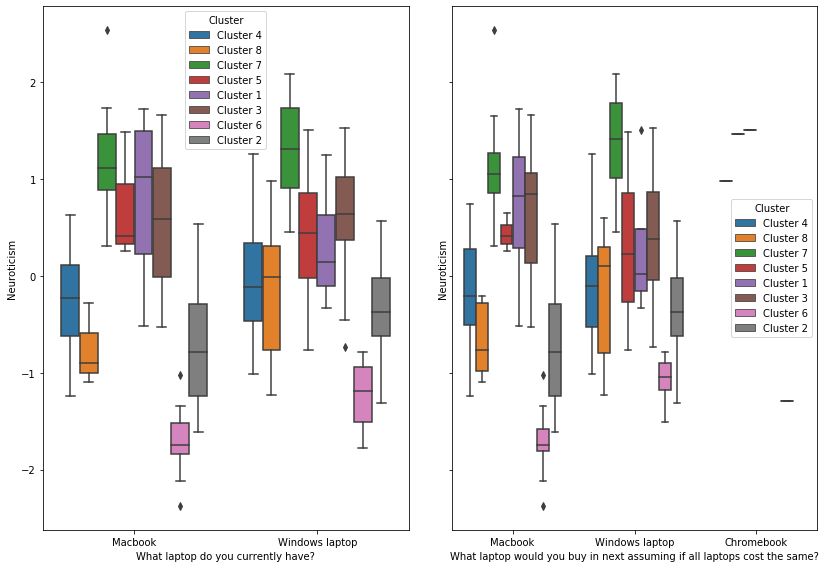

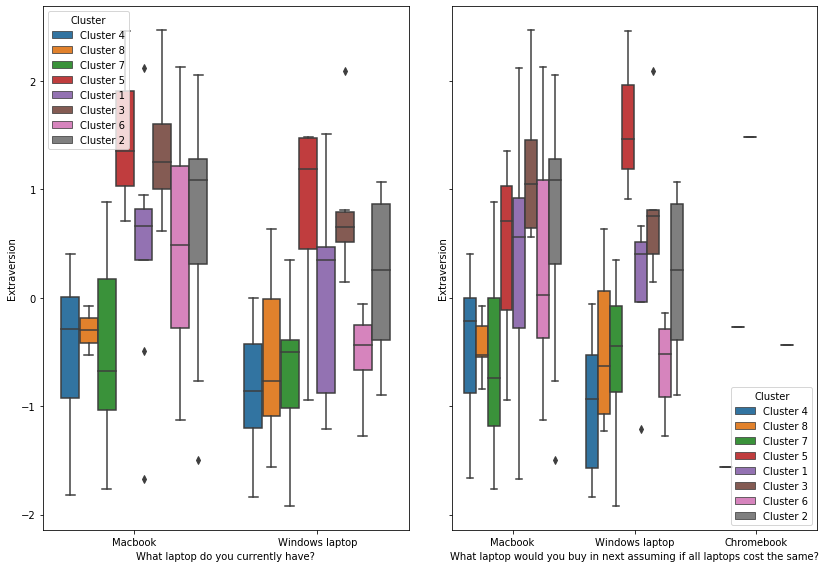

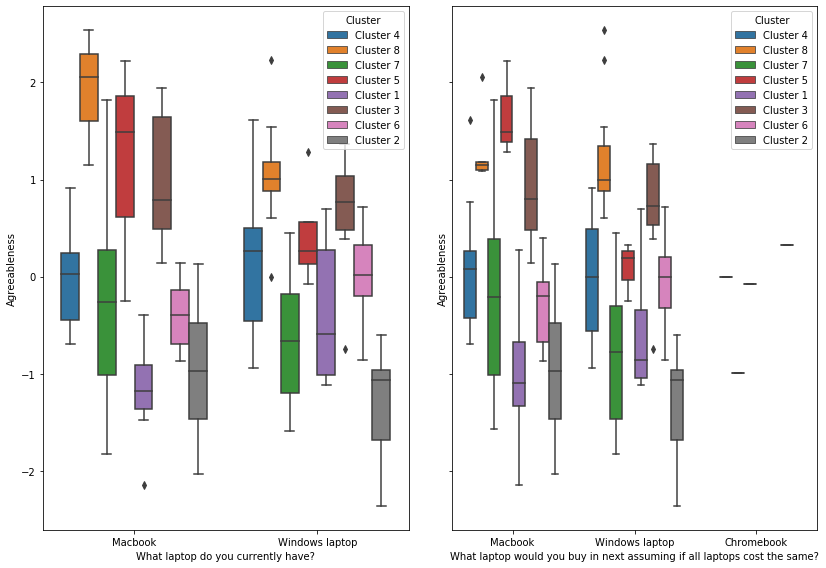

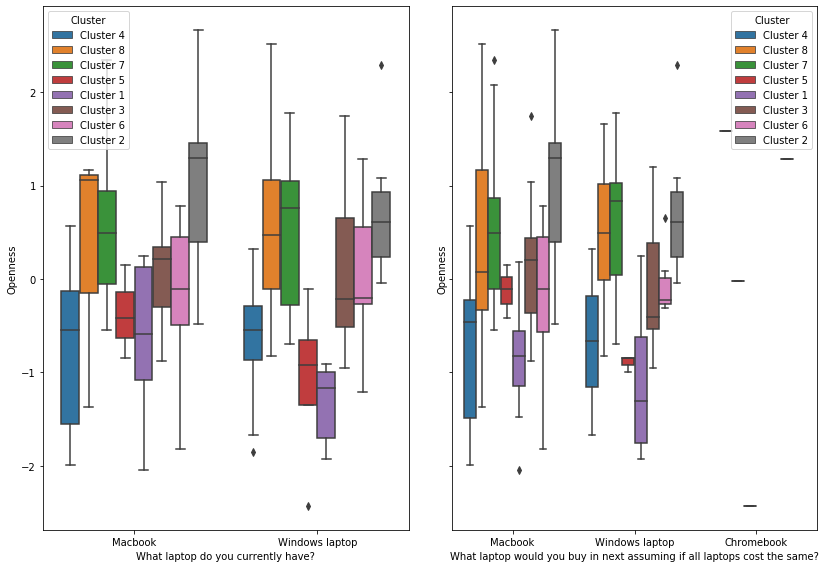

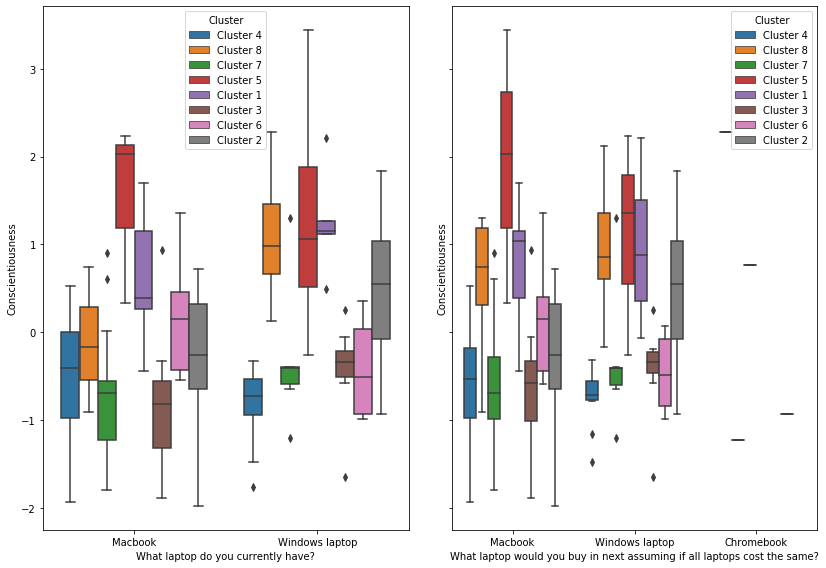

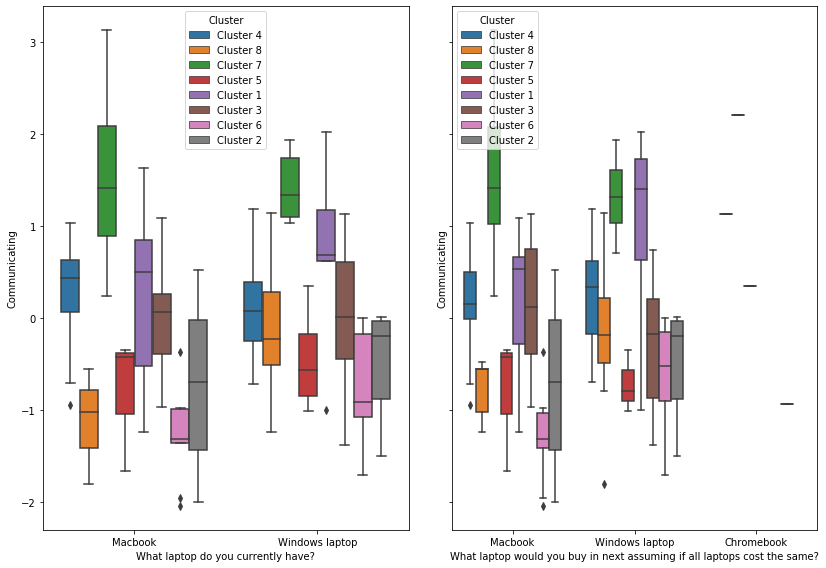

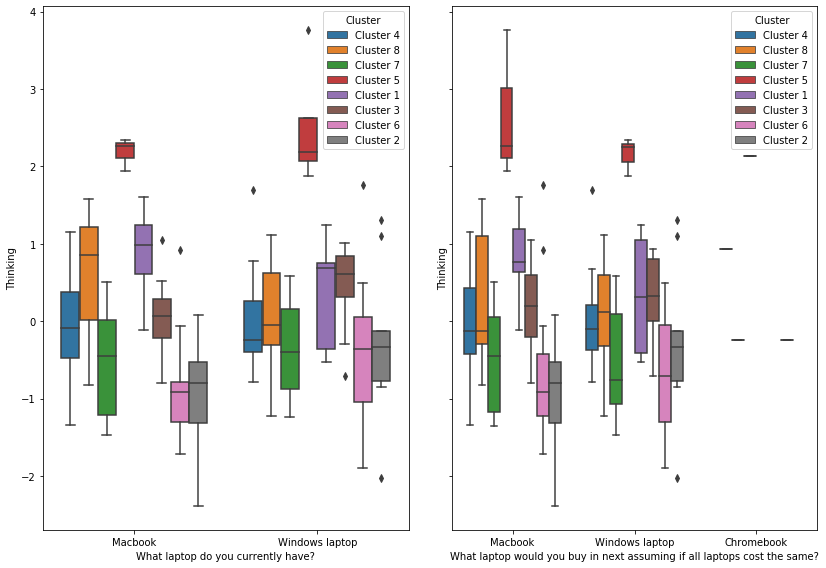

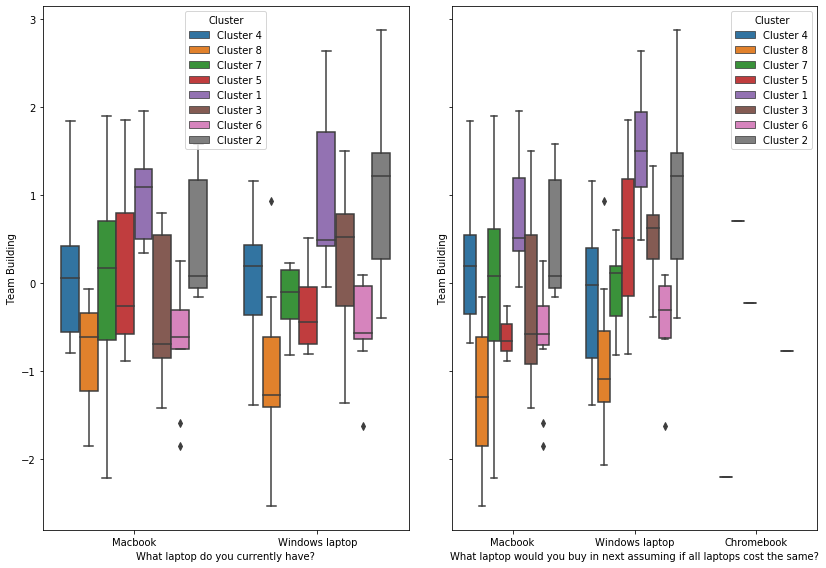

<Figure size 432x288 with 0 Axes>

In [134]:
## build boxplot to get insight
# base on cluster
for i in list_p:
    fig, axes = plt.subplots(1, 2, sharey = True, figsize = (12, 8))
    sns.boxplot(x = 'What laptop do you currently have?',
               y = i,
               data = pca_df,
               hue = 'Cluster',
               ax = axes[0])
    sns.boxplot(x = 'What laptop would you buy in next assuming if all laptops cost the same?',
               y = i,
               data = pca_df,
               hue = 'Cluster',
               ax = axes[1])
    plt.tight_layout()
    plt.show()

plt.savefig('Cluster.png')

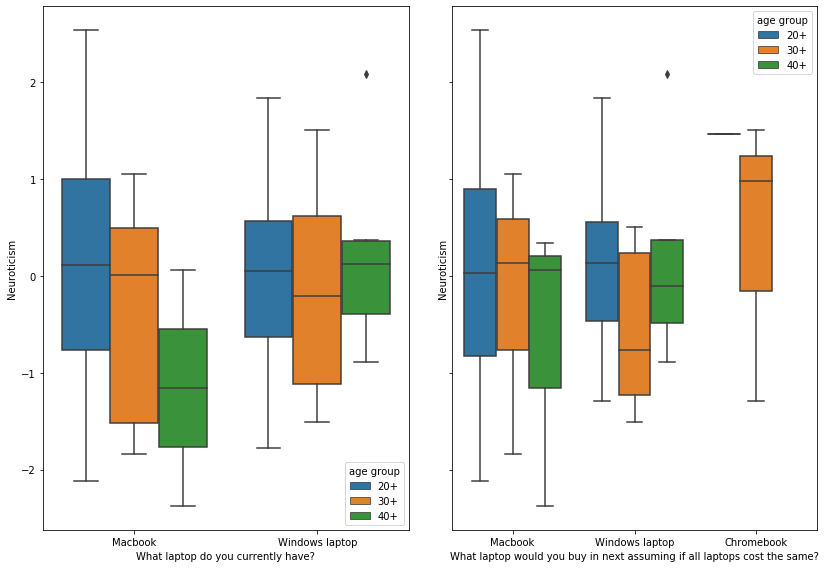

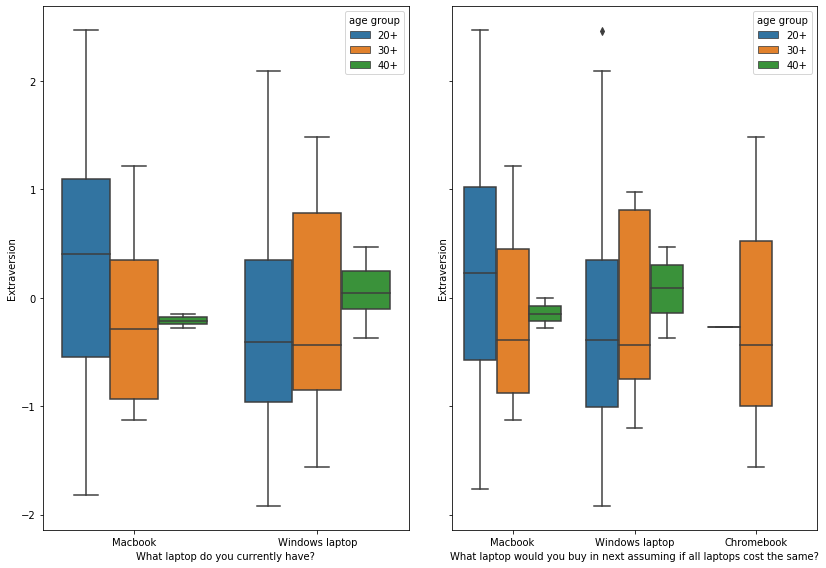

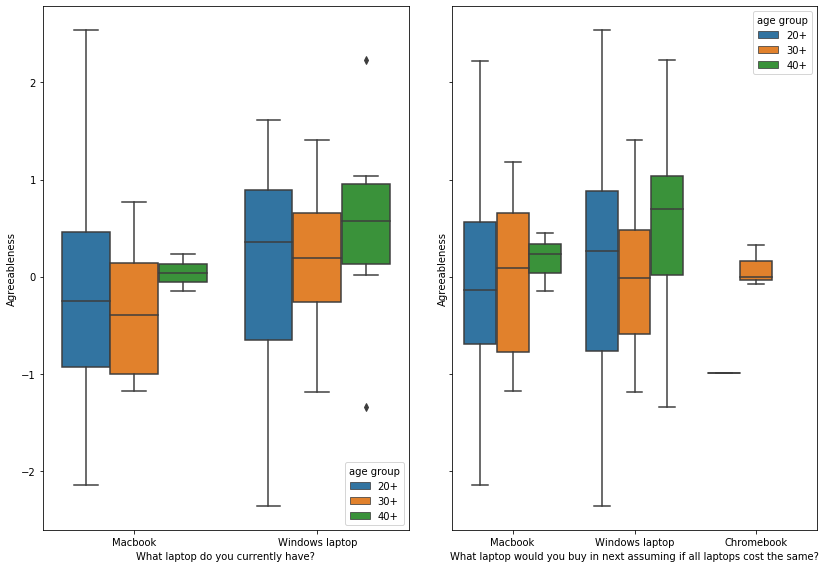

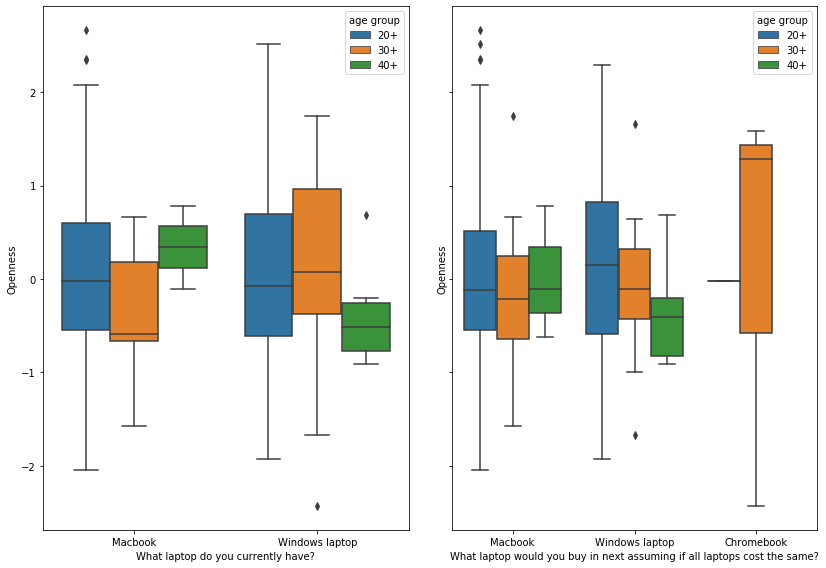

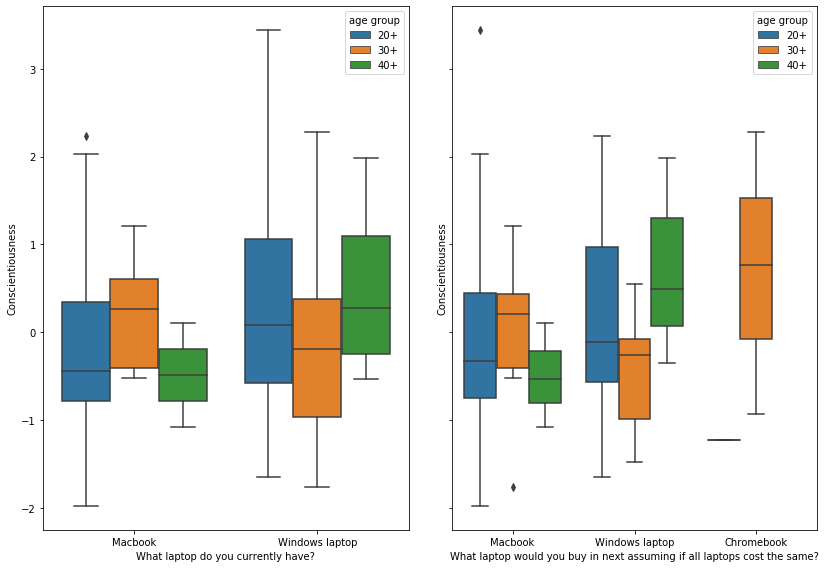

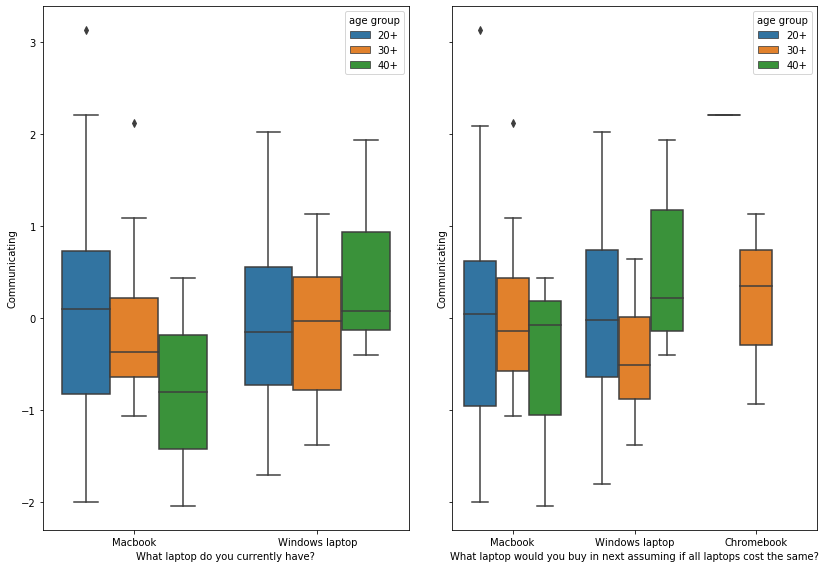

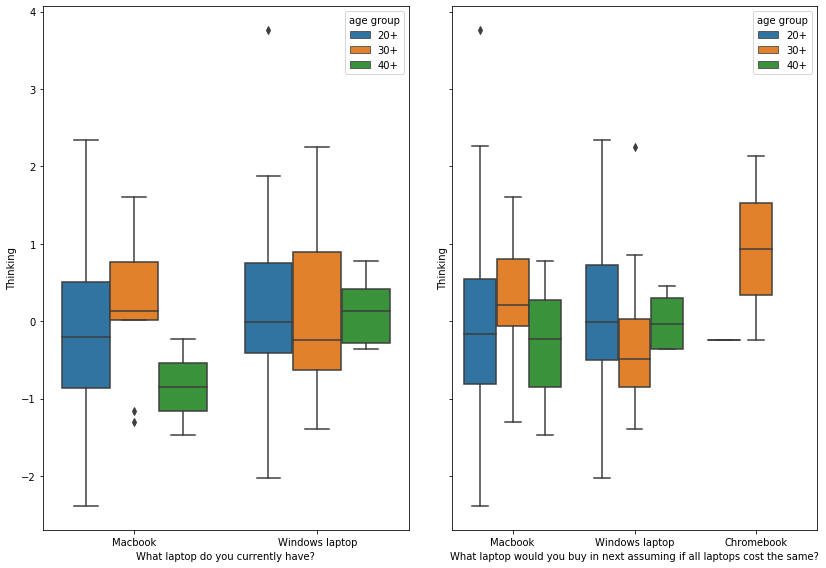

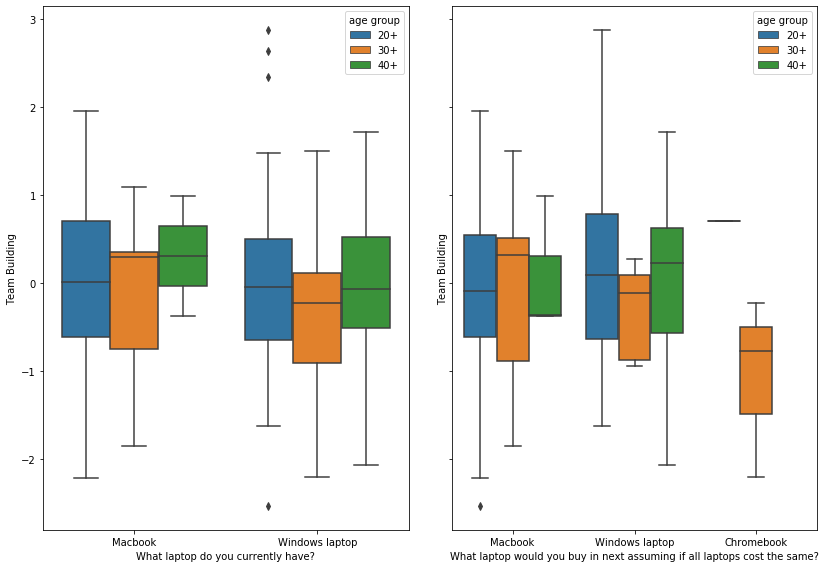

<Figure size 432x288 with 0 Axes>

In [135]:
# base on age group
for i in list_p:
    fig, axes = plt.subplots(1, 2, sharey = True, figsize = (12, 8))
    sns.boxplot(x = 'What laptop do you currently have?',
               y = i,
               data = pca_df,
               hue = 'age group',
               ax = axes[0])
    sns.boxplot(x = 'What laptop would you buy in next assuming if all laptops cost the same?',
               y = i,
               data = pca_df,
               hue = 'age group',
               ax = axes[1])
    plt.tight_layout()
    plt.show()

plt.savefig('age.png')

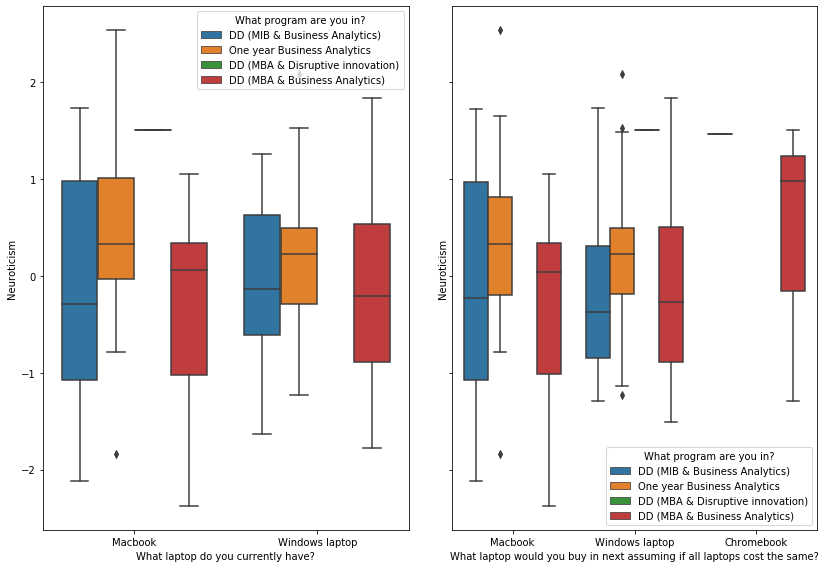

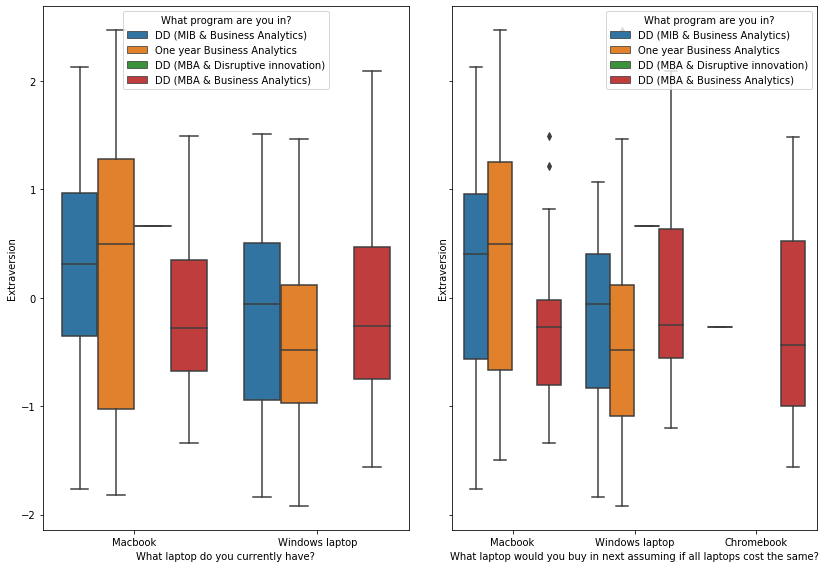

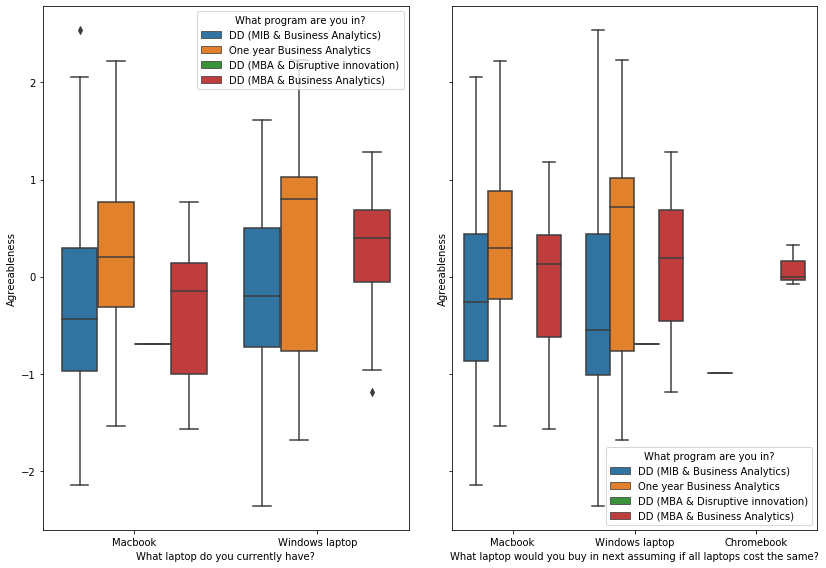

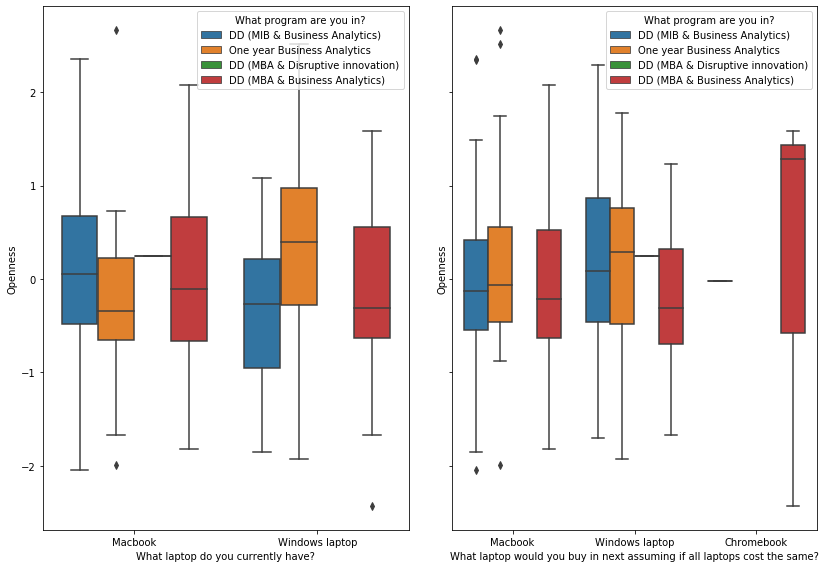

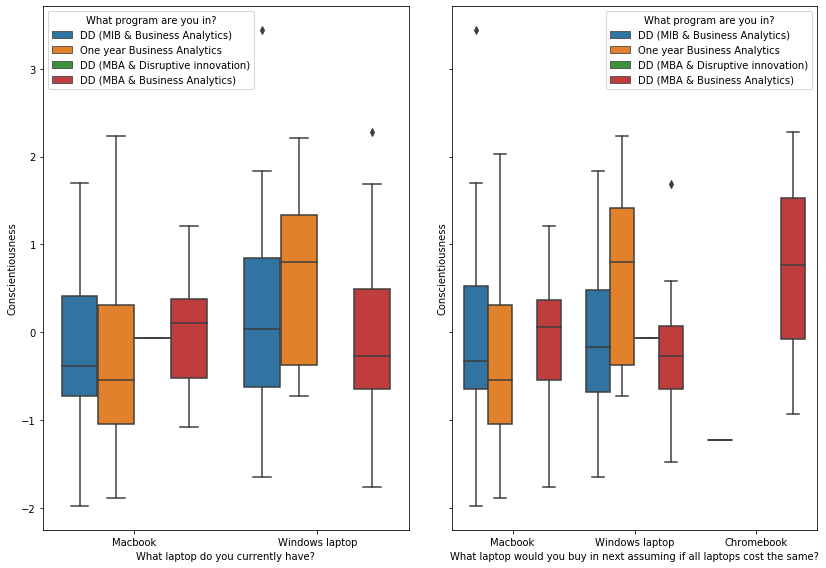

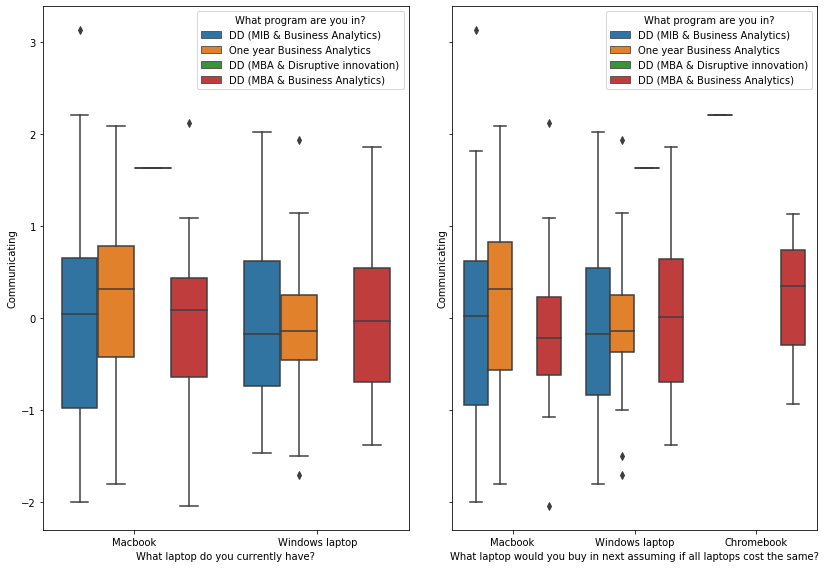

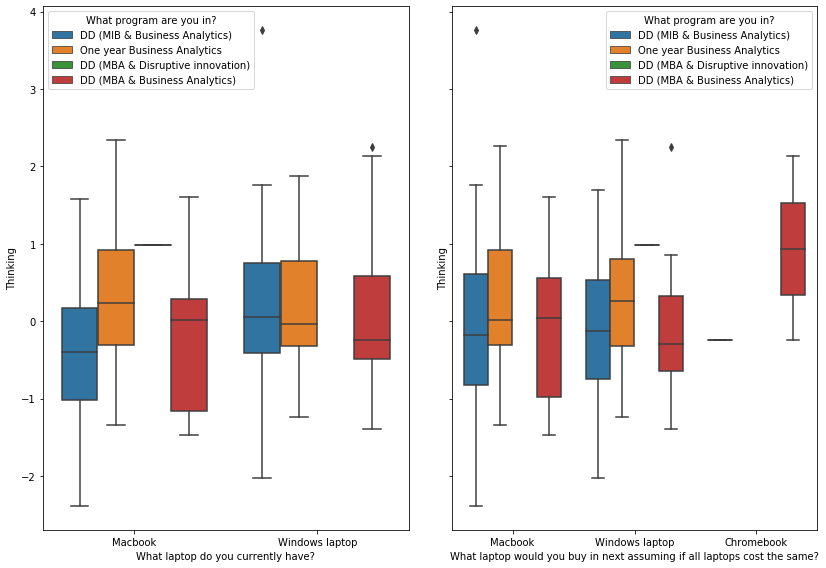

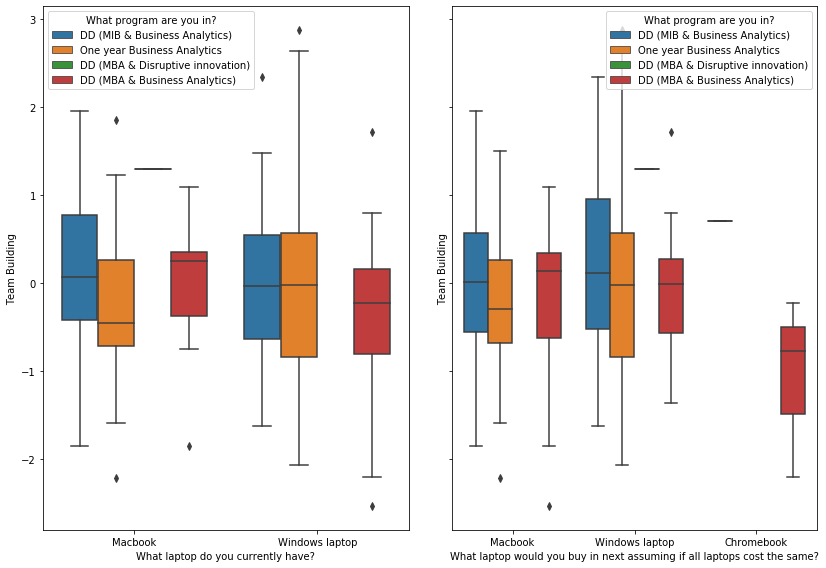

<Figure size 432x288 with 0 Axes>

In [136]:
# base on program
for i in list_p:
    fig, axes = plt.subplots(1, 2, sharey = True, figsize = (12, 8))
    sns.boxplot(x = 'What laptop do you currently have?',
               y = i,
               data = pca_df,
               hue = 'What program are you in?',
               ax = axes[0])
    sns.boxplot(x = 'What laptop would you buy in next assuming if all laptops cost the same?',
               y = i,
               data = pca_df,
               hue = 'What program are you in?',
               ax = axes[1])
    plt.tight_layout()
    plt.show()
    
plt.savefig('program.png')